In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 18

In [2]:
def get_df(file):
    with open(file, "rb") as f:
        data = pickle.load(f)

        df = (
            pd.DataFrame(
                [
                    [key[0], key[1], policy, train_return, test_return]
                    for key in data["agent_policies"].keys()
                    for policies, train_returns, test_returns in zip(
                        data["agent_policies"][key],
                        data["train_returns"][key],
                        data["test_returns"][key],
                    )
                    for policy, train_return, test_return in zip(
                        policies, train_returns, test_returns
                    )
                ],
                columns=["population", "lookback", "policy", "train", "test"],
            )
            .melt(
                id_vars=["population", "lookback", "policy"],
                value_vars=["train", "test"],
                var_name="phase",
                value_name="return",
            )
            .sort_values(by="policy", ascending=True)
        )

        return df

In [3]:
df = get_df("analysis/agents-ipd.pickle")

df

,population,lookback,policy,phase,return
0,16,1,CCCC,train,55807
103583,128,1,CCCC,test,59292
103584,128,1,CCCC,test,59283
103585,128,1,CCCC,test,59100
103586,128,1,CCCC,test,59568
...,...,...,...,...,...
34362,128,3,DDDDCCCDCCCCCCCCCDCCCDCCCCCCCCCCCCCCCCCCCCCCCC...,train,55552
61216,512,3,DDDDCCDCCCCCDCCDCCCDCDCCCCCCCCCCCCCCCCCCCDCCCC...,train,51703
162016,512,3,DDDDCCDCCCCCDCCDCCCDCDCCCCCCCCCCCCCCCCCCCDCCCC...,test,52911
93238,512,5,DDDDDCCCCCCCCCCCDDCDDCCCCDCCCCCCCCCCCCCCCDDCCC...,train,50489


In [4]:
counts = df[
    (df["population"] == 256) & (df["lookback"] == 2) & (df["phase"] == "train")
]["policy"].value_counts()

counts[:20]

CCCCCCCCCCCCCCCC    1823
CCDCCCCCCCCCCCCC     173
DCCCCCCCCCCCCCCC     157
CCCCCDCCCCCCCCCC     138
CCCDCCCCCCCCCCCC     135
CCCCDCCCCCCCCCCC     129
CDCCCCCCCCCCCCCC     116
CCCCCCCCCCCDCCCC     113
CCCCCCCDCCCCCCCC     107
CCCCCCCCCDCCCCCC     107
CCCCCCDCCCCCCCCC     104
CCCCCCCCCCCCCDCC      97
CCCCCCCCCCCCCCDC      95
CCCCCCCCCCCCDCCC      85
CCCCCCCCDCCCCCCC      62
CCCCCCCCCCCCCCCD      40
CCCDCCCDCCCCCCCC      29
CDCCCDCCCCCCCCCC      27
CDCCCCCCCCCCCDCC      27
CCCDCCCCCCCDCCCC      24
Name: policy, dtype: int64

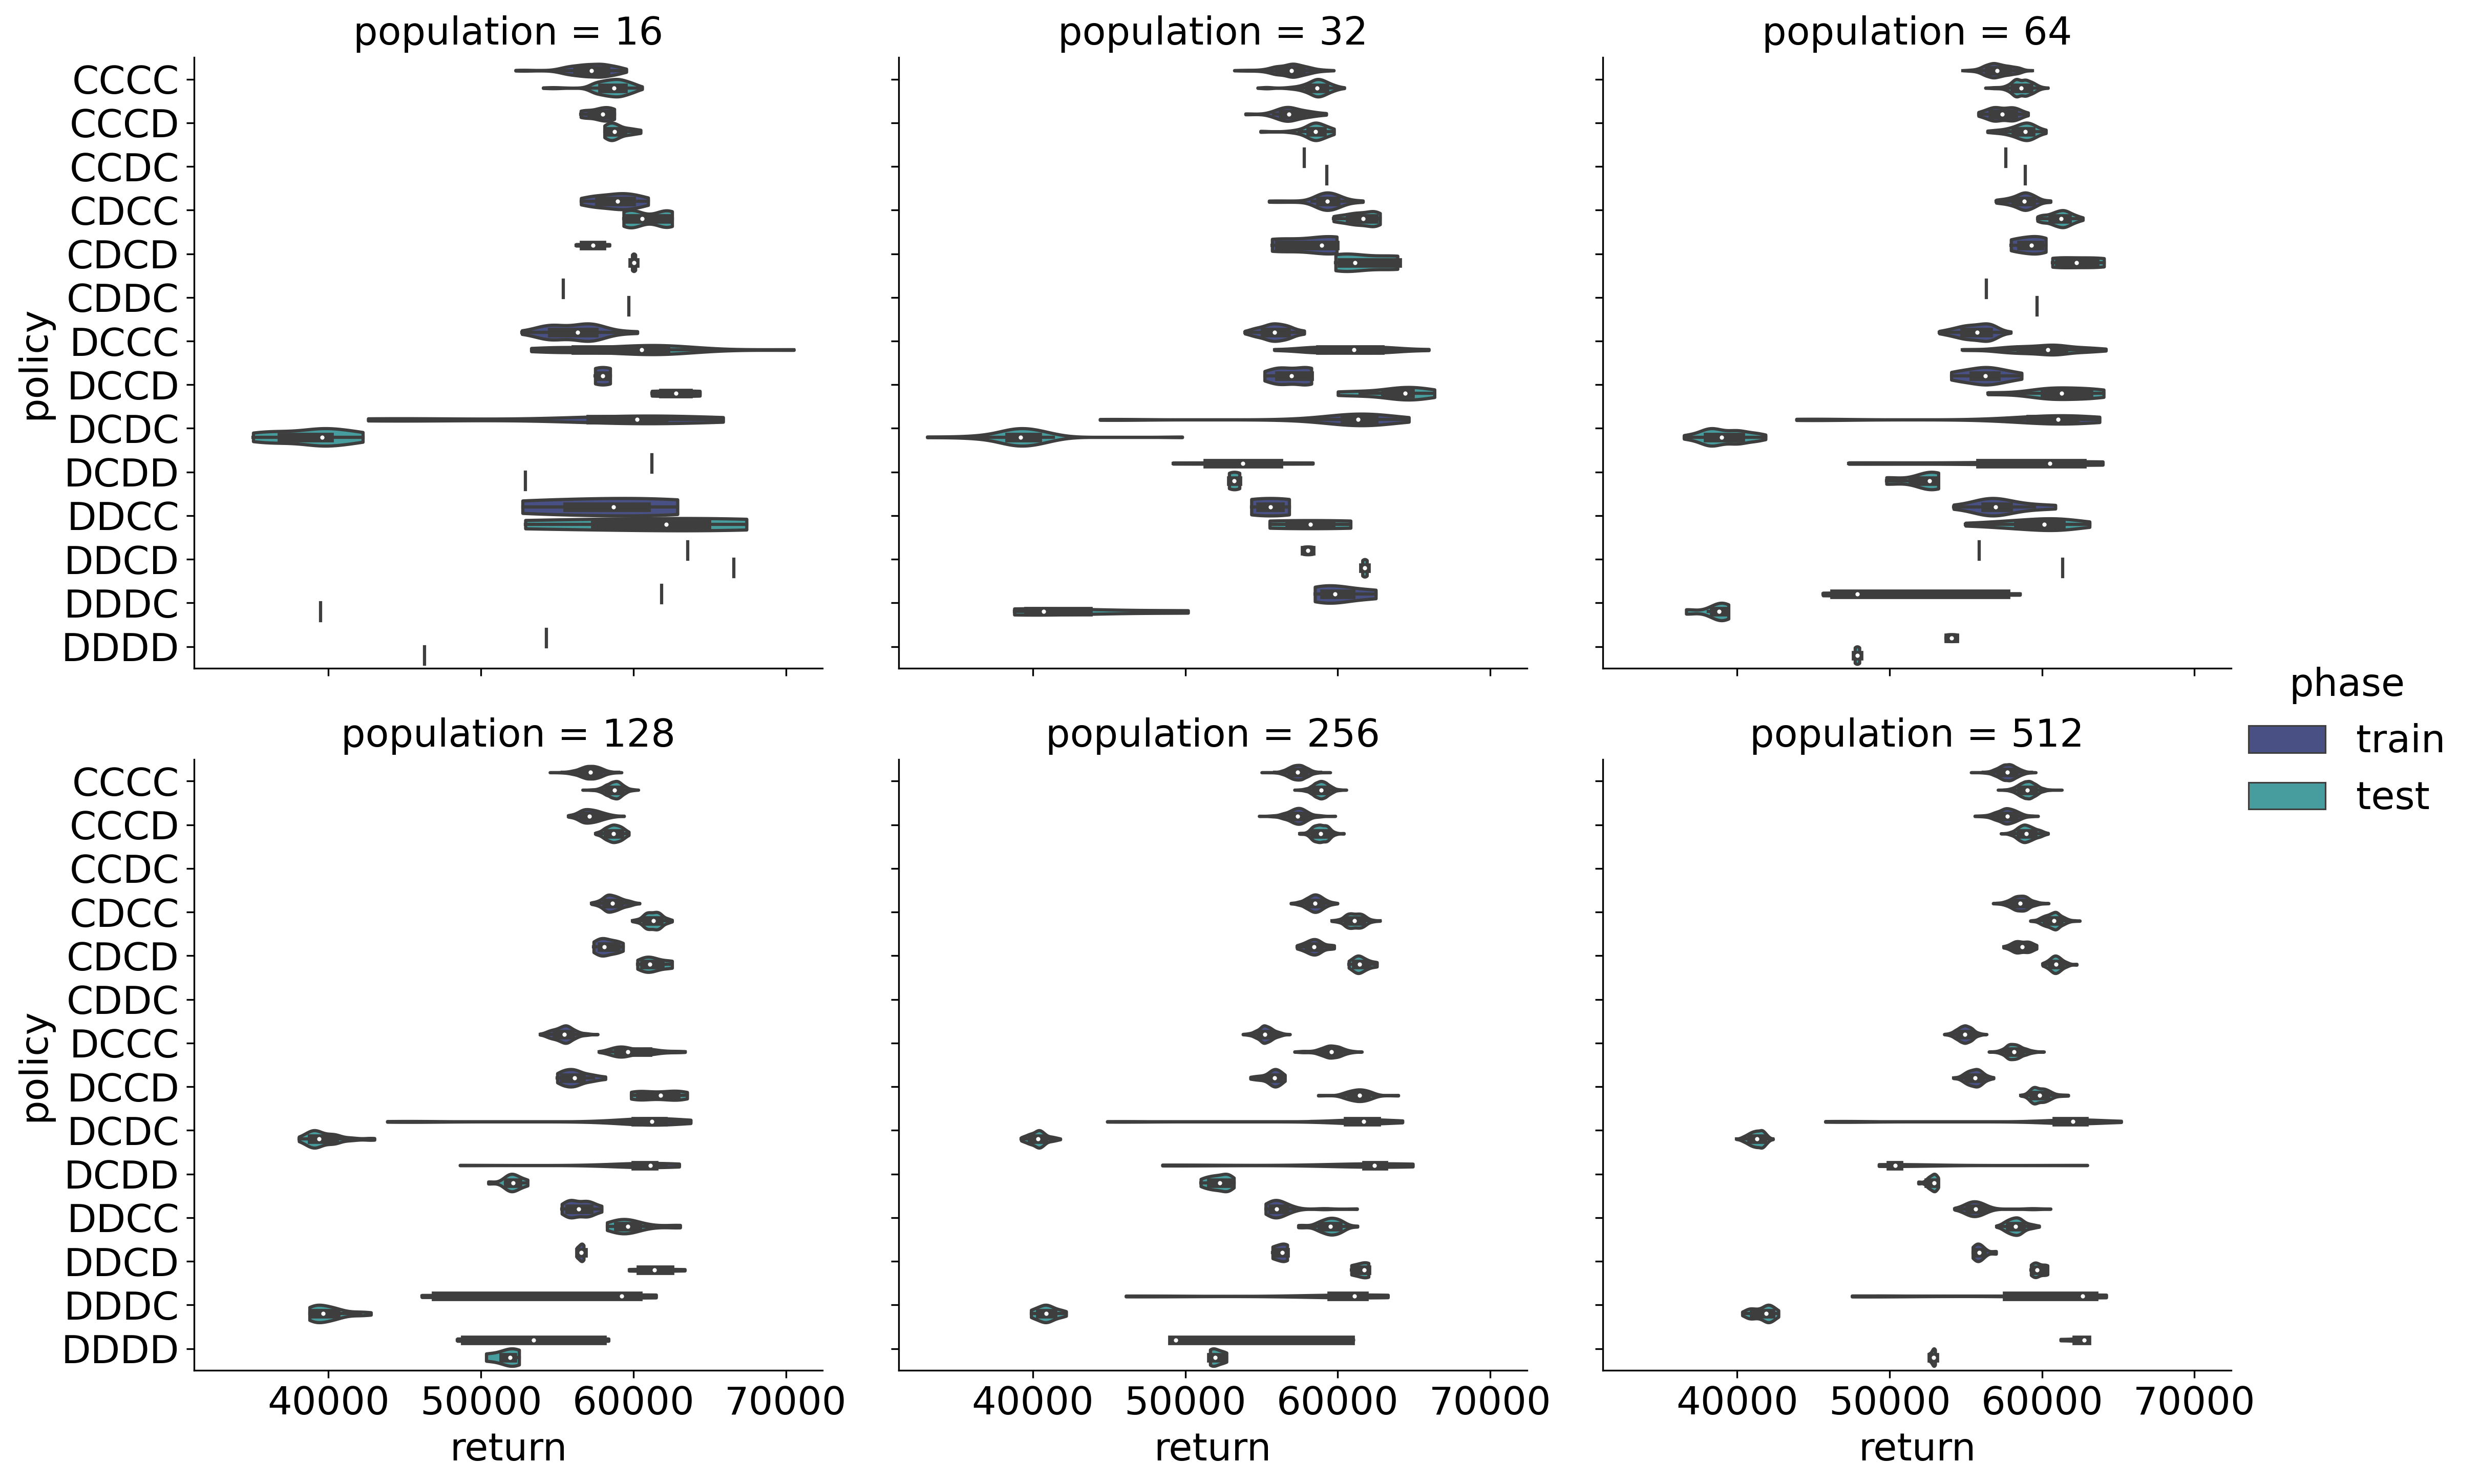

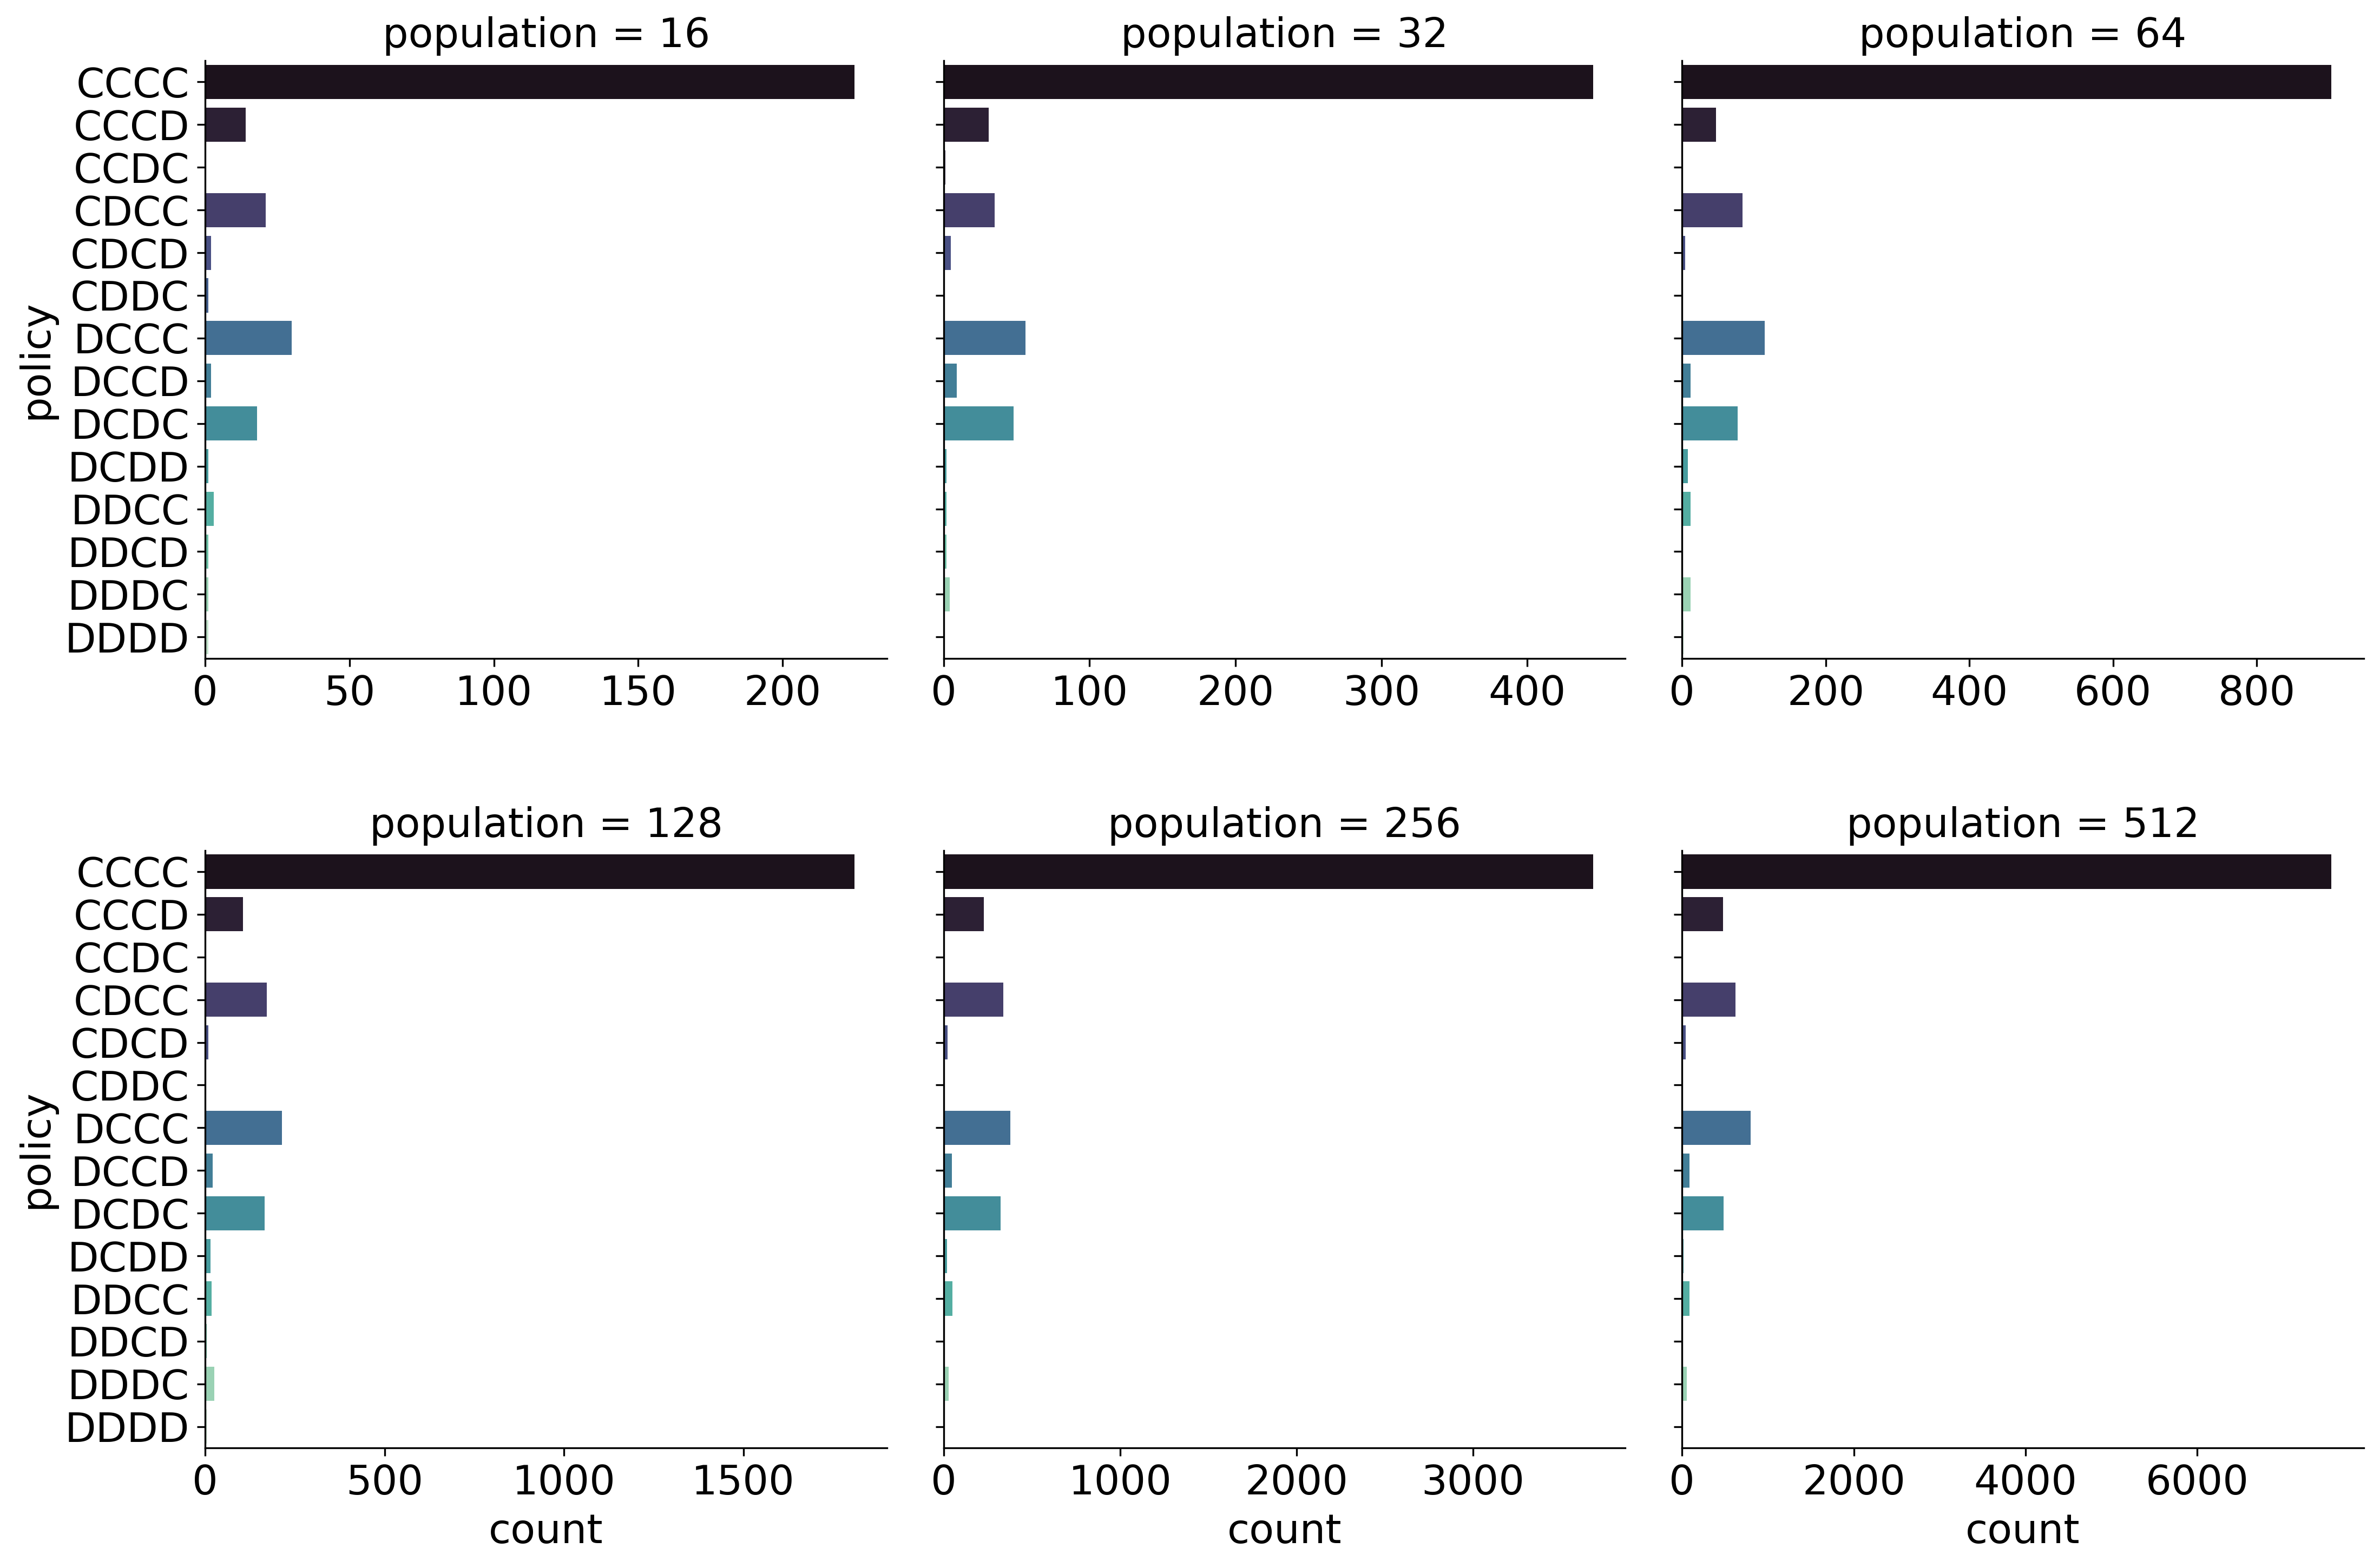

In [5]:
sns.catplot(
    data=df[df["lookback"] == 1],
    x="return",
    y="policy",
    hue="phase",
    col="population",
    col_wrap=3,
    kind="violin",
    cut=0,
    palette="mako",
    errorbar="sd",
)

sns.catplot(
    data=df[(df["lookback"] == 1) & (df["phase"] == "train")],
    y="policy",
    col="population",
    col_wrap=3,
    kind="count",
    palette="mako",
    errorbar="sd",
    sharex=False,
)

In [6]:
df = get_df("analysis/agents-ipd-threshold-0.2.pickle")

df

,population,lookback,policy,phase,return
0,16,1,CCCC,train,56722
20868,512,1,CCCC,train,57724
20867,512,1,CCCC,train,57112
116439,512,1,CCCC,test,58827
20865,512,1,CCCC,train,57116
...,...,...,...,...,...
50584,32,4,DDDDCCDDCCCDCCDCDCCDCCCCCCCCCCCCCDCCCCCCCDCCCD...,train,55883
176629,512,4,DDDDCDCCCCCCDCCCCCCCCCCCCCCCCDCCCCCCCDCCCCCCCC...,test,54367
75829,512,4,DDDDCDCCCCCCDCCCCCCCCCCCCCCCCDCCCCCCCDCCCCCCCC...,train,53977
81168,512,4,DDDDDCCDCCCCCCCCCCCCCCCCCCCCCCCDCCCCCCCCCCCCCC...,train,54215


In [7]:
counts = df[
    (df["population"] == 256) & (df["lookback"] == 2) & (df["phase"] == "train")
]["policy"].value_counts()

counts[:20]

CCCCCCCCCCCCCCCC    1772
CCDCCCCCCCCCCCCC     169
CCCCDCCCCCCCCCCC     146
DCCCCCCCCCCCCCCC     145
CCCCCDCCCCCCCCCC     134
CCCDCCCCCCCCCCCC     125
CDCCCCCCCCCCCCCC     124
CCCCCCDCCCCCCCCC     110
CCCCCCCCCDCCCCCC     108
CCCCCCCCCCCCCCDC     107
CCCCCCCCCCCCCDCC      92
CCCCCCCCCCCDCCCC      92
CCCCCCCDCCCCCCCC      86
CCCCCCCCCCCCDCCC      69
CCCCCCCCDCCCCCCC      49
CCCCCCCCCCCCCCCD      48
CDCCCCCCCCCCCDCC      32
CCCDCCCDCCCCCCCC      28
CCCDCCCCCCCCCCCD      25
CCDCCCDCCCCCCCCC      24
Name: policy, dtype: int64

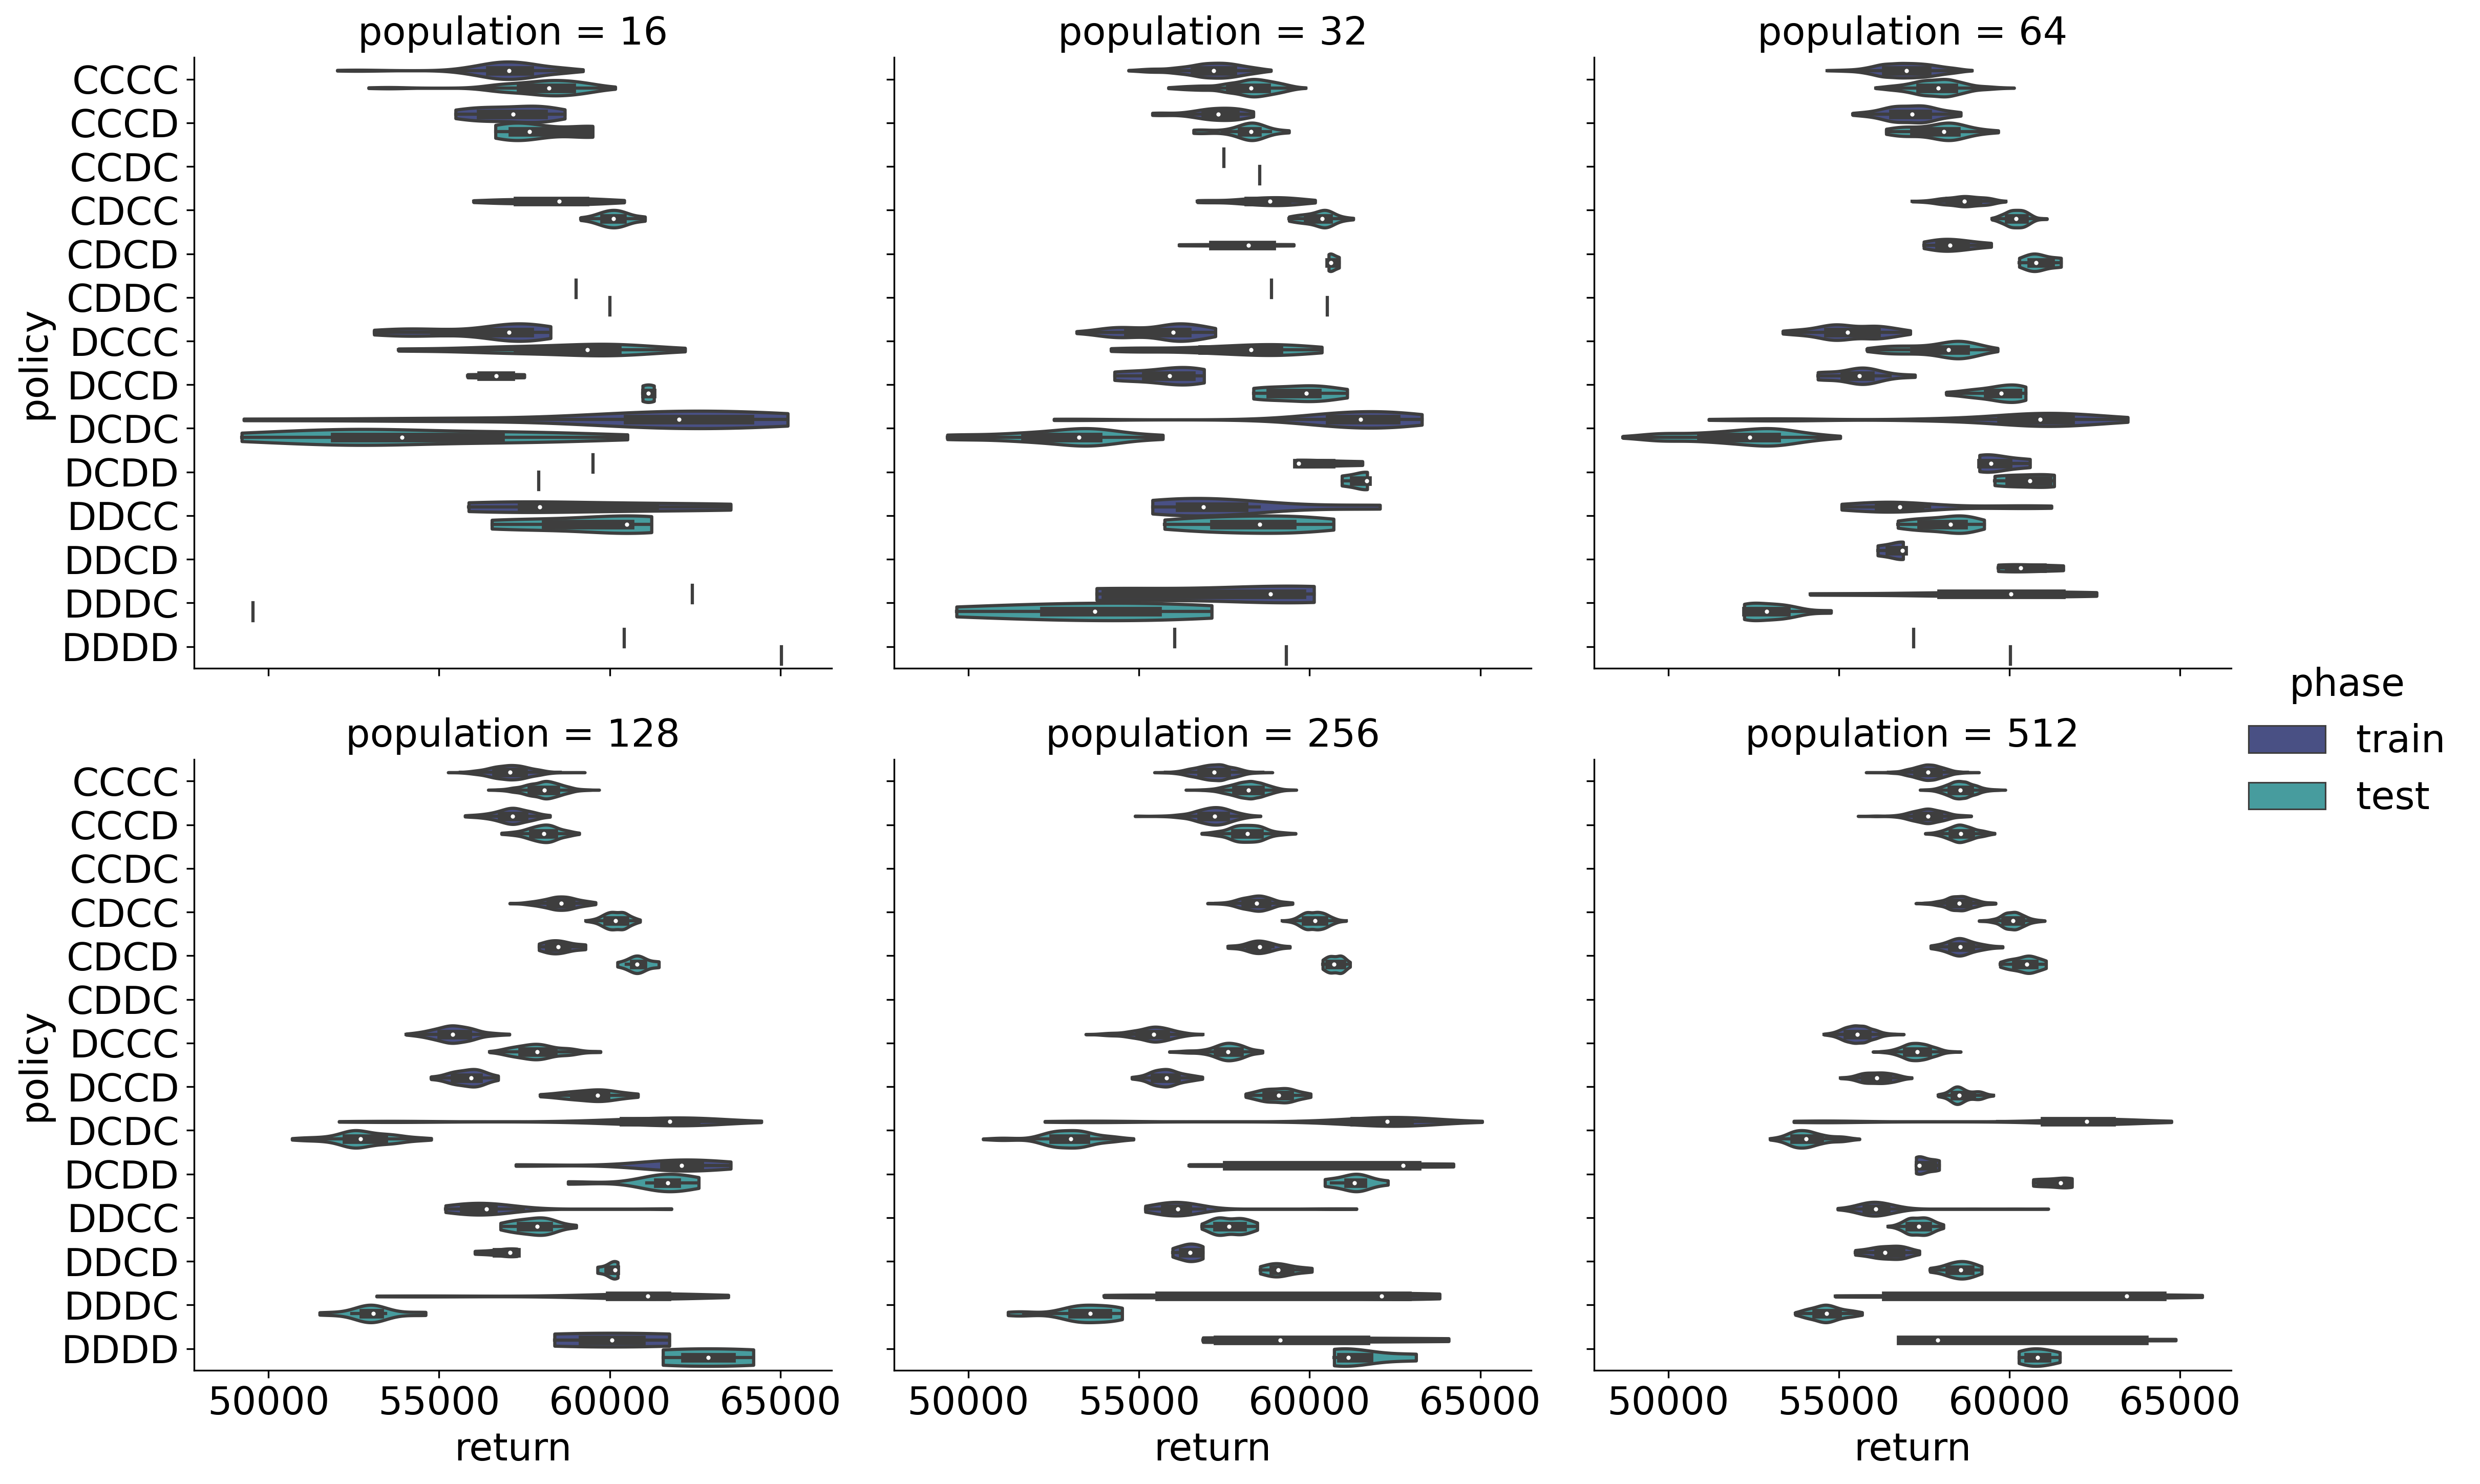

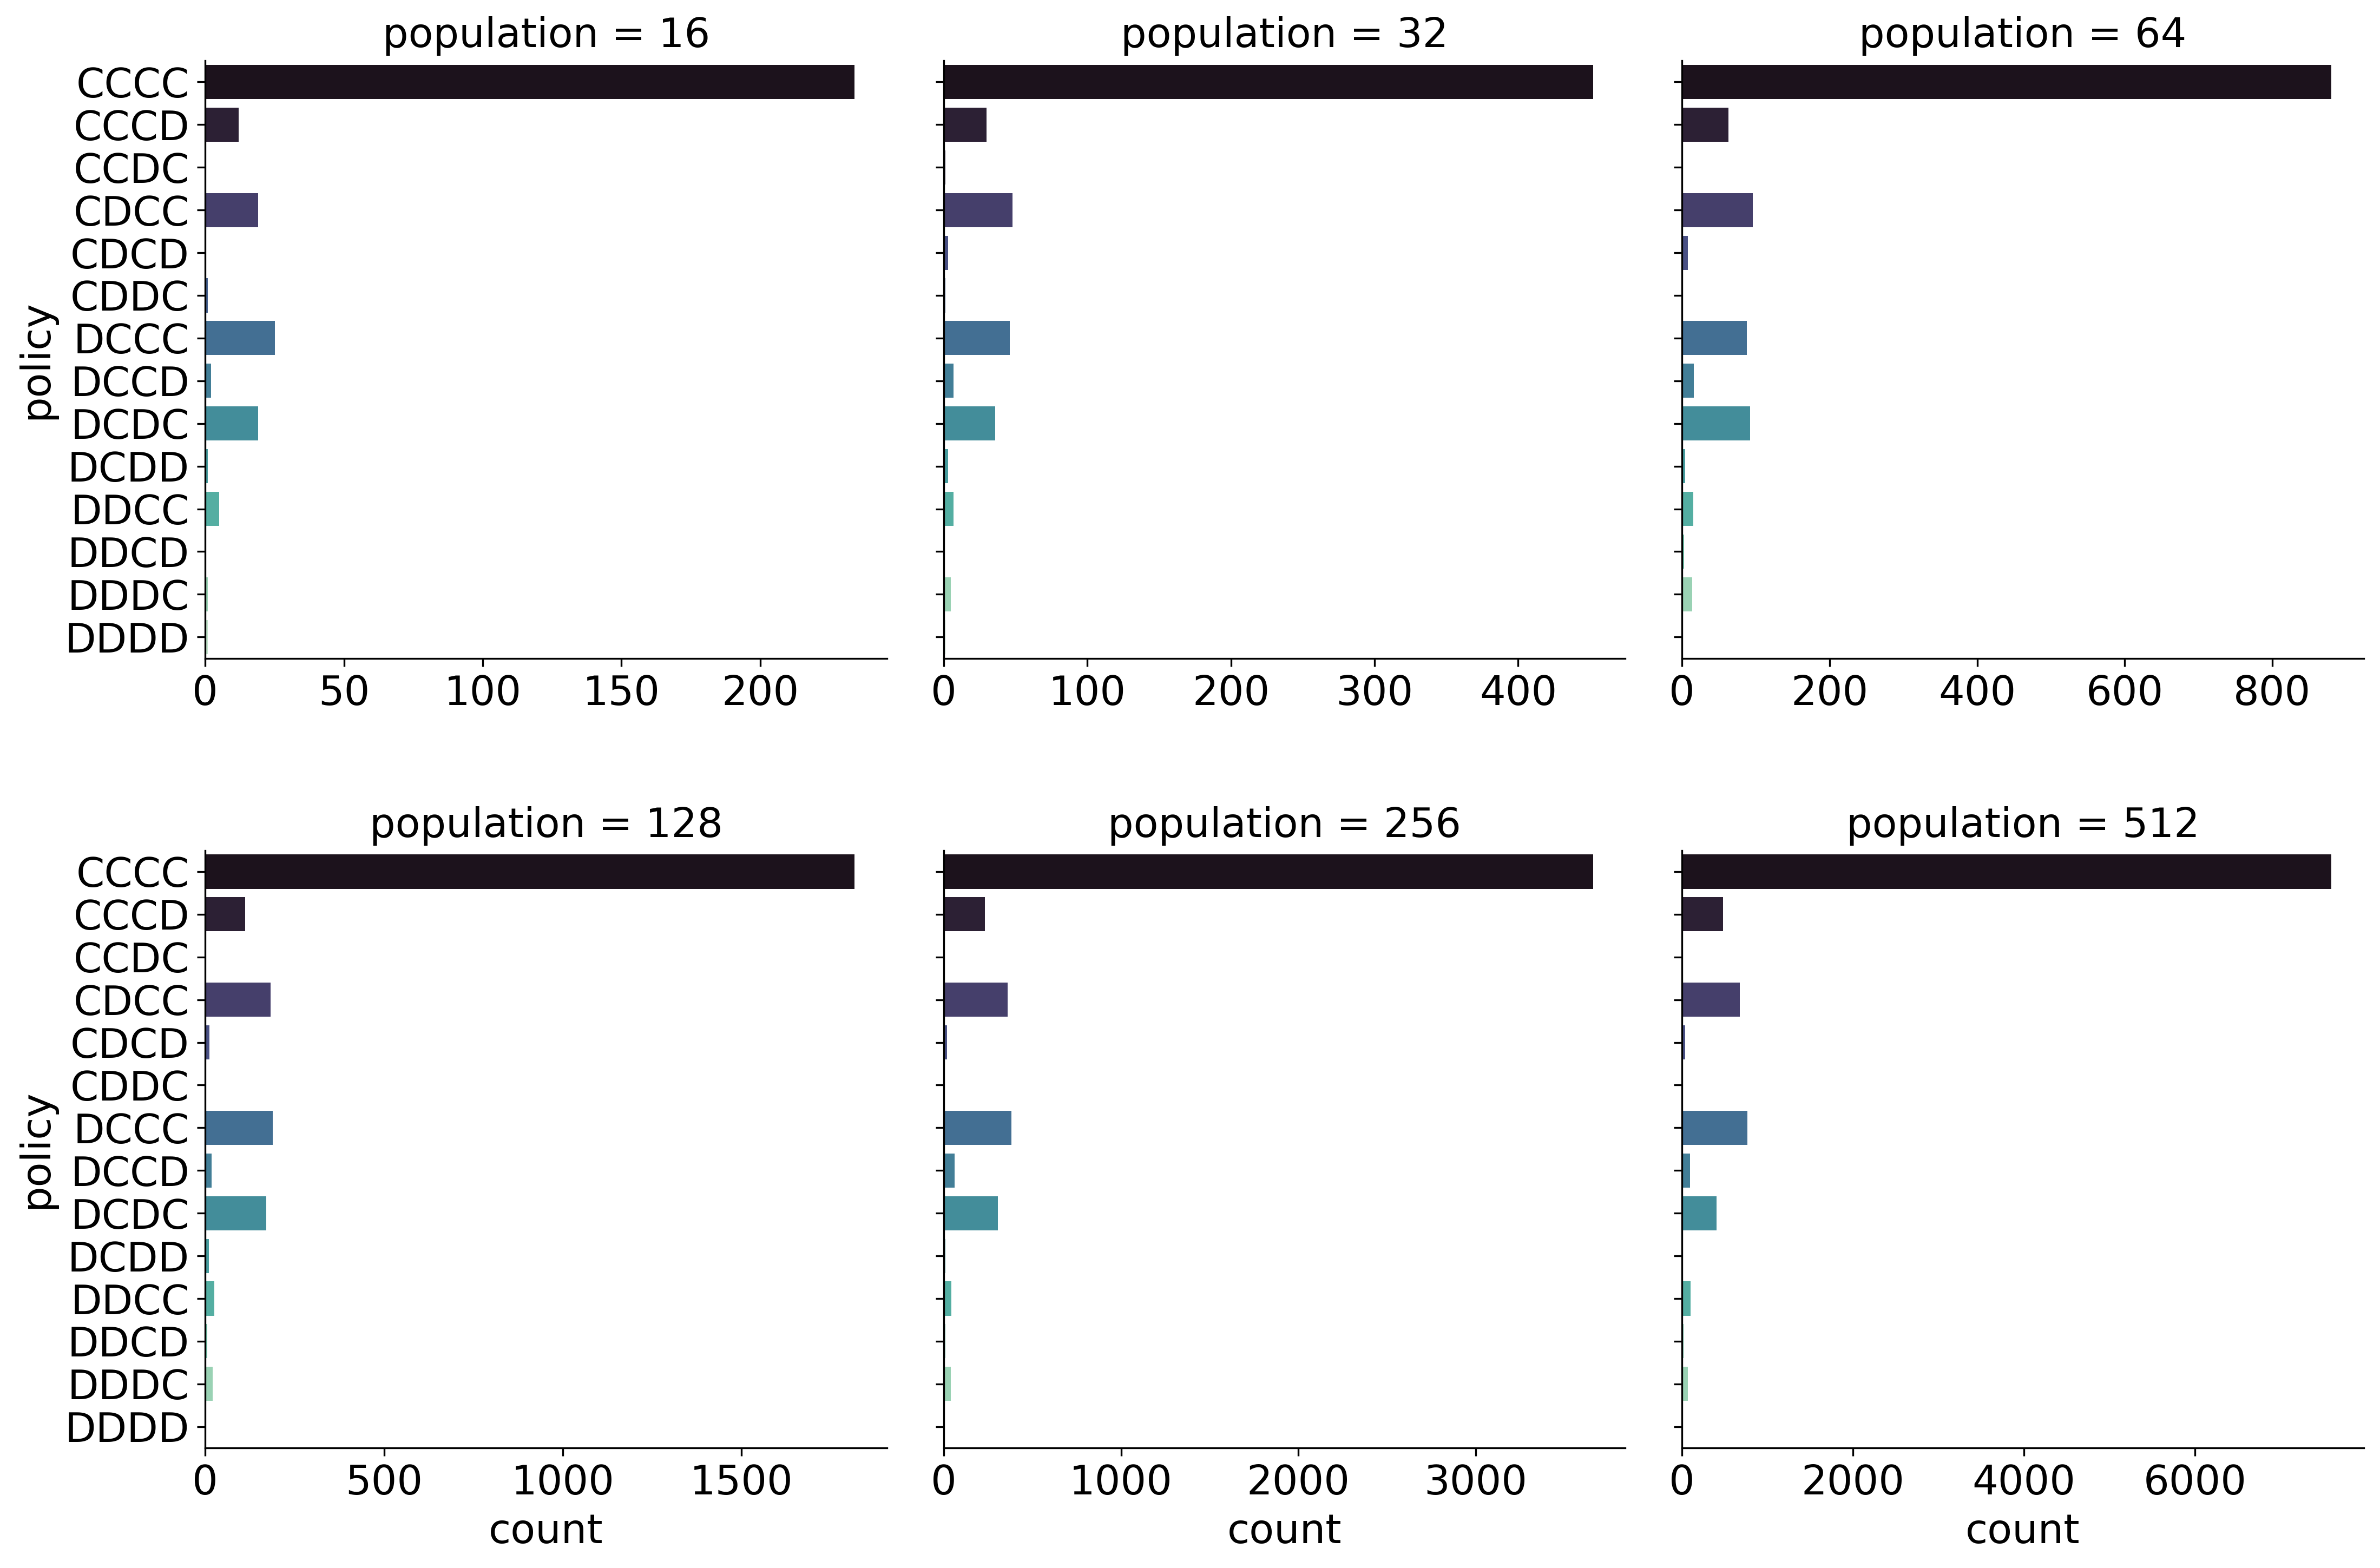

In [8]:
sns.catplot(
    data=df[df["lookback"] == 1],
    x="return",
    y="policy",
    hue="phase",
    col="population",
    col_wrap=3,
    kind="violin",
    cut=0,
    palette="mako",
    errorbar="sd",
)

sns.catplot(
    data=df[(df["lookback"] == 1) & (df["phase"] == "train")],
    y="policy",
    col="population",
    col_wrap=3,
    kind="count",
    palette="mako",
    errorbar="sd",
    sharex=False,
)

In [9]:
df = get_df("analysis/agents-ipd-epsilon-0.2.pickle")

df

,population,lookback,policy,phase,return
122700,512,1,CCCC,test,45306
118968,512,1,CCCC,test,45585
119012,512,1,CCCC,test,45849
119035,512,1,CCCC,test,45849
119075,512,1,CCCC,test,46464
...,...,...,...,...,...
151042,16,4,DDDDDDDCCDCCCCDDCCCCCCCCCDCCCCCCCCCCCDCCCDCCCC...,test,54143
87729,256,5,DDDDDDDCCDDCCCDDCDCCCCDCDCCCCDCCCCCCCCCCCCDCCC...,train,47991
188529,256,5,DDDDDDDCCDDCCCDDCDCCCCDCDCCCCDCCCCCCCCCCCCDCCC...,test,45129
79276,512,4,DDDDDDDCDDCCDCCDCCCCCCCCDCCDCCCCCCDDCCCDCCCDCD...,train,48845


In [10]:
counts = df[
    (df["population"] == 256) & (df["lookback"] == 2) & (df["phase"] == "train")
]["policy"].value_counts()

counts[:20]

CCCCCCCCCCCCCCCC    368
CCCCCCDCCCCCCCCC     88
CCCCCCCCCDCCCCCC     83
CCCCCDCCCCCCCCCC     76
CCDCCCCCCCCCCCCC     69
CCCCCCCDCCCCCCCC     69
CDCCCCCCCCCCCCCC     68
CCCCDCCCCCCCCCCC     68
CCCDCCCCCCCCCCCC     59
DCCCCCCCCCCCCCCC     56
CCCCCCCCCCCDCCCC     54
CCCCCCCCCCCCDCCC     51
CCCCCCCCCCCCCDCC     49
CCCCCCCCCCCCCCDC     38
CCCCCCCCDCCCCCCC     28
CCCDCCCCCCCDCCCC     25
CDCCCCCCCCCCCDCC     24
CCDCCCCCCCCDCCCC     22
CCDCCCCCCCDCCCCC     22
CDCCCDCCCCCCCCCC     20
Name: policy, dtype: int64

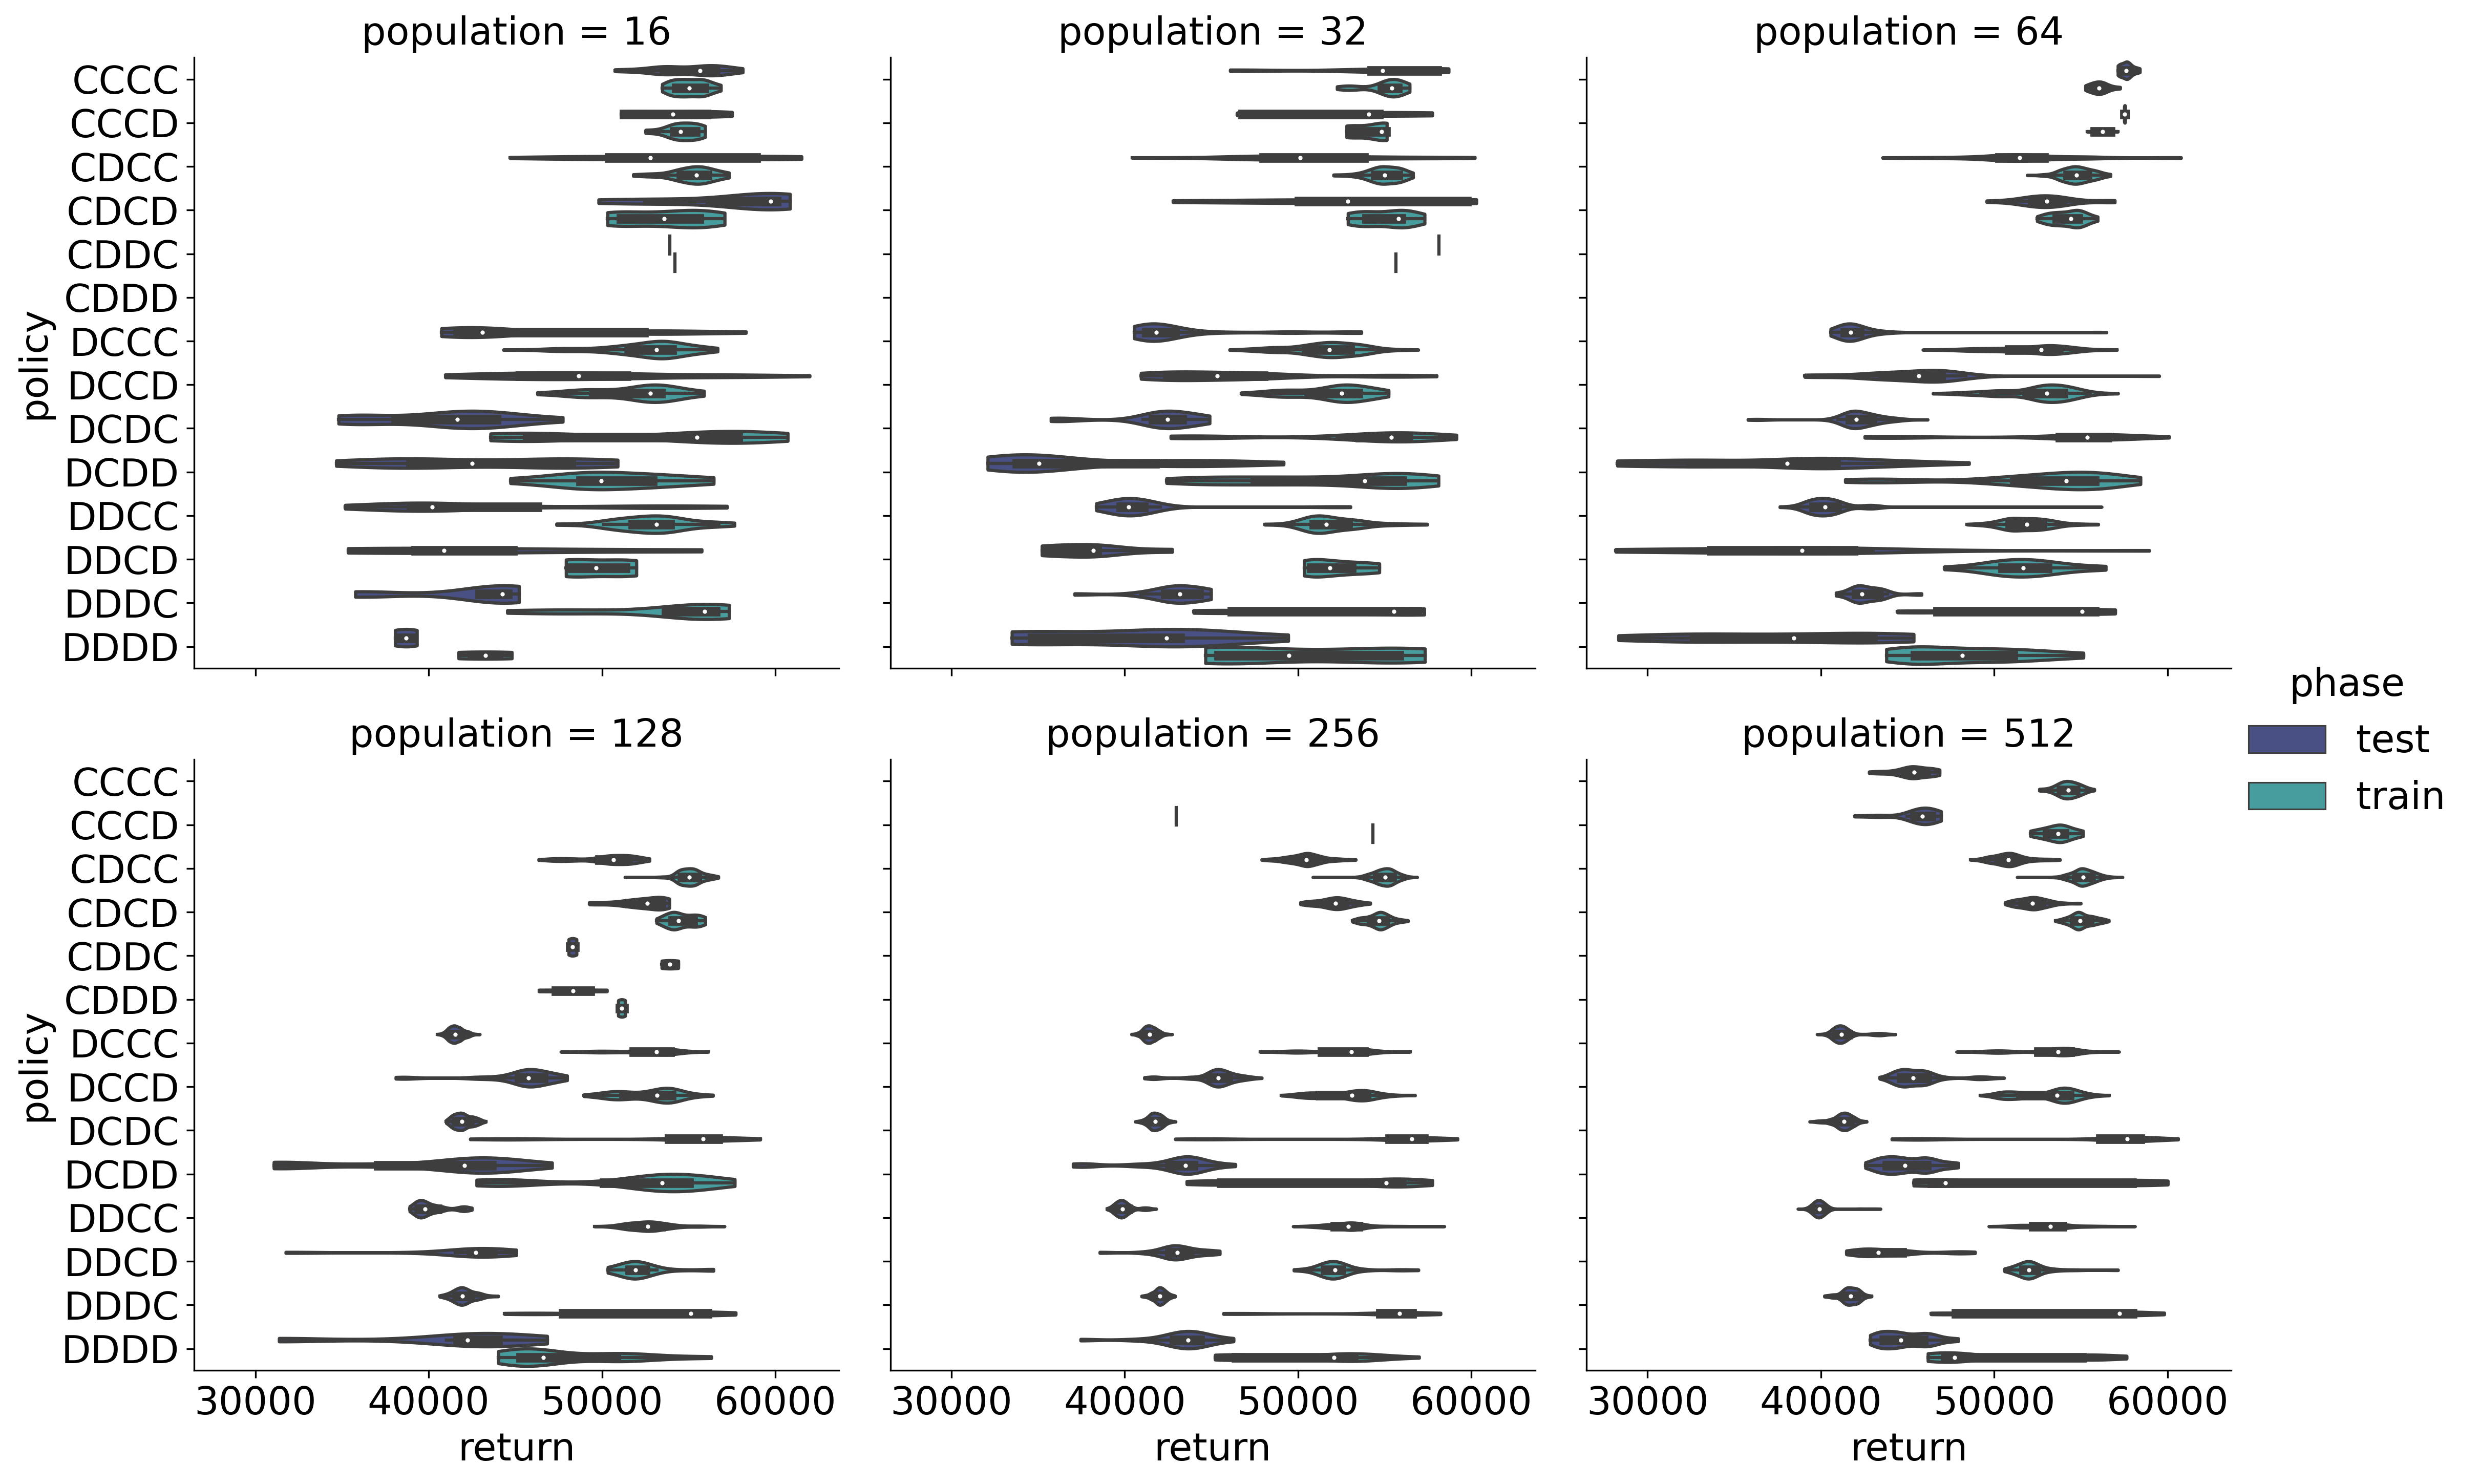

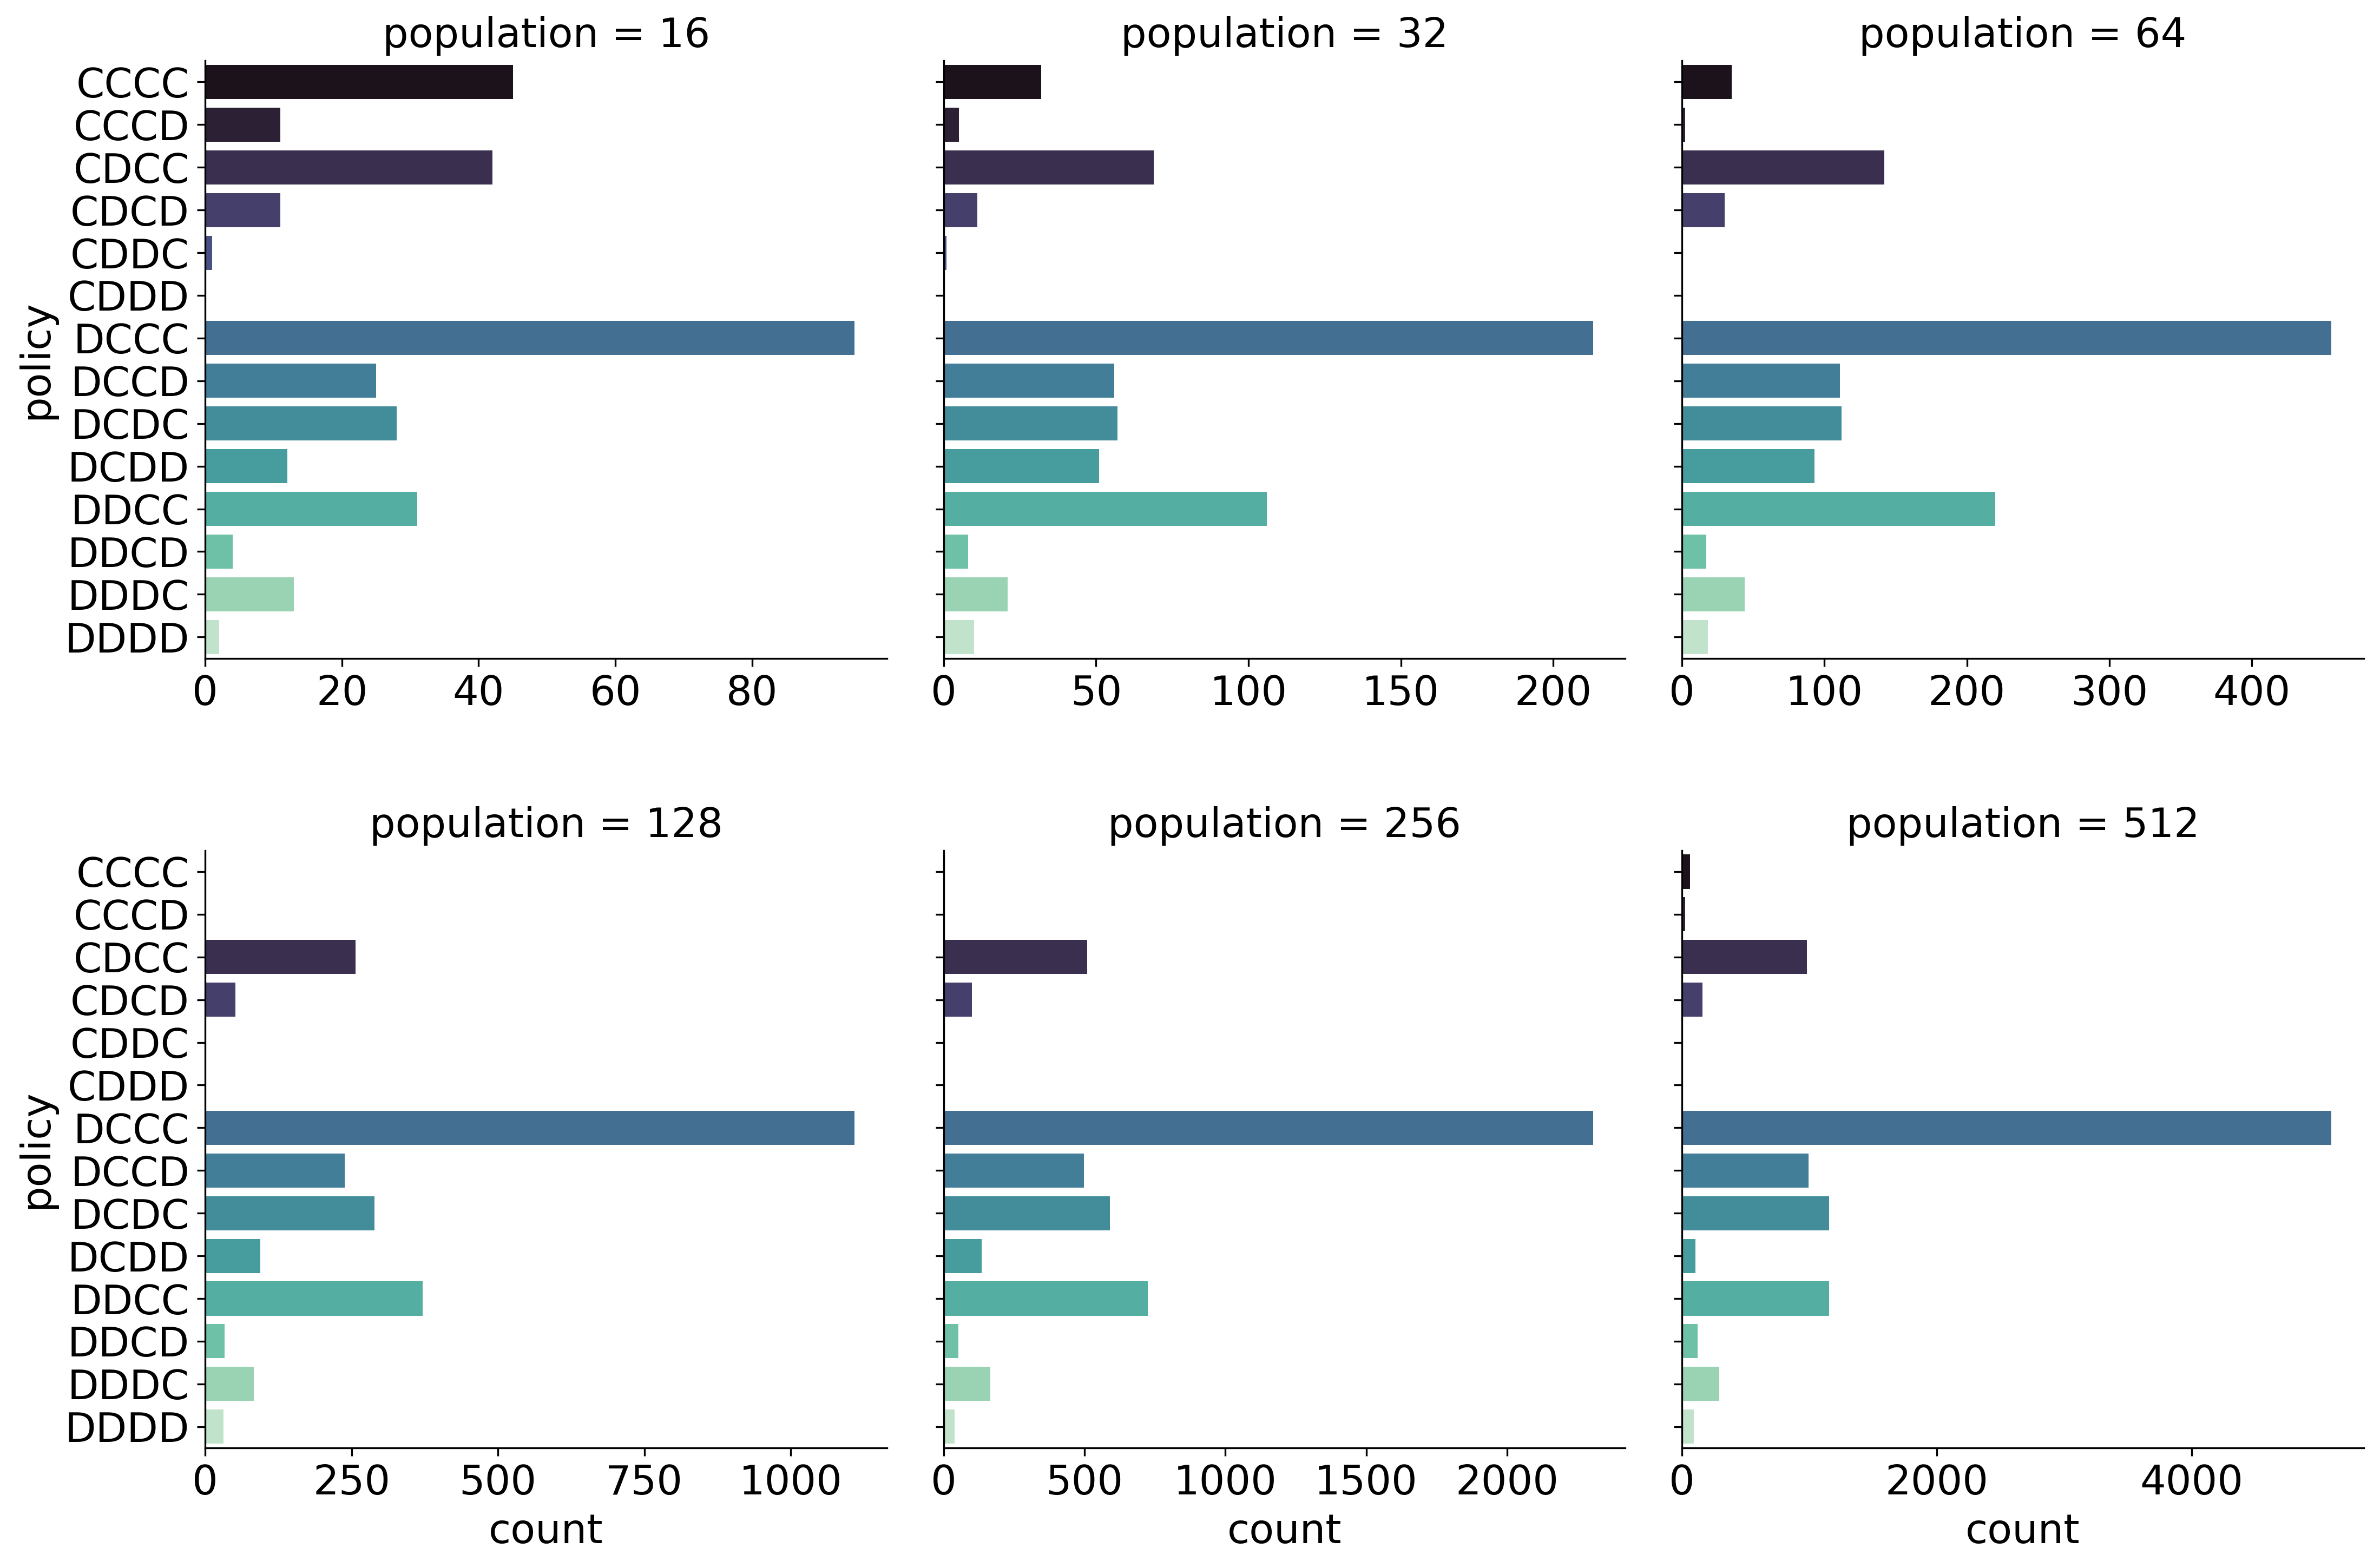

In [11]:
sns.catplot(
    data=df[df["lookback"] == 1],
    x="return",
    y="policy",
    hue="phase",
    col="population",
    col_wrap=3,
    kind="violin",
    cut=0,
    palette="mako",
    errorbar="sd",
)

sns.catplot(
    data=df[(df["lookback"] == 1) & (df["phase"] == "train")],
    y="policy",
    col="population",
    col_wrap=3,
    kind="count",
    palette="mako",
    errorbar="sd",
    sharex=False,
)